In [0]:
# create own dataset from Google image

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

In [0]:
# search and scroll in Google Image
# download into file: run JS code (get_url.js) in browser to save the URLs of all images
# save the image urls in csv files
# when use Google Colab, upload the csv files

In [0]:
# create dir and upload urls file into your server
# 1. choose names for labeled images and mkdir
# 2. download images

# max_works: if have problem download, try with max_works=0 to see exceptions
# max_works: default is 8 and it means CPUs

In [0]:
folder = 'gjbwg'
file = 'urls_gjbwg.csv'

path = Path('data/landmark')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

path.ls()

download_images(file, dest, max_pics = 50, max_workers=0)

In [0]:
folder = 'tam'
file = 'urls_tam.csv'

path = Path('data/landmark')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

path.ls()

download_images(file, dest, max_pics = 50, max_workers=0)

In [0]:
folder = 'rmdht'
file = 'urls_rmdht.csv'

path = Path('data/landmark')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

path.ls()
download_images(file, dest, max_pics = 50, max_workers=0)

In [0]:
# remove any image that can not be open
# resize image less than max_size

In [0]:
classes = ['rmdht', 'tam', 'gjbwg']
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [0]:
# view images

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)
# if already cleaned your data
# data = ImageDataBunch.from_csv(path, train=".", valid_pct=0.2, csv_labels="cleaned.csv", ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [11]:
# len(data.train_ds) + len(data.valid_ds): total number of image
# en(data.train_ds) and len(data.valid_ds) proportion: valid_pct=0.2
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['gjbwg', 'rmdht', 'tam'], 3, 116, 28)

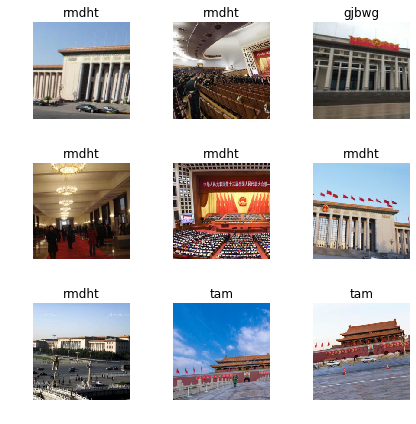

In [12]:
data.show_batch(rows=3, figsize=(6,6))

In [0]:
# train the model
# Following are the steps to train a good model:
# 1. download the model
# 2. freeze the initial layers
# 3. train the model
# 4. unfreeze the layers
# 5. train the model with best suited learning rate
# 6. save model weights

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
# the model is freeze and most of the starting layers are set to trainable=False
# train the last layer (FC layer) or group 

In [42]:
learn.fit_one_cycle(4)

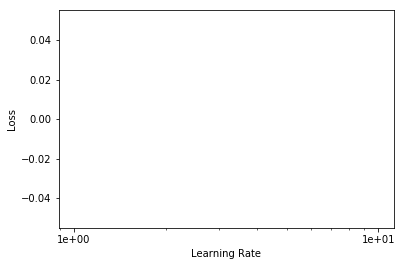

In [43]:
learn.recorder.plot()

In [0]:
# unfreeze the model and every layers can be trainned

In [0]:
learn.unfreeze()

In [0]:
# use lr_find() before fit_one_cycle() to get best suited learning rate for underlying data
# If the plot is not showing try to give a start and end learning rate:
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
# learn.recorder.plot()

In [16]:
learn.lr_find()
learn.recorder.plot()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [45]:
learn.fit_one_cycle(5, max_lr=slice(1e-4, 1e-2))

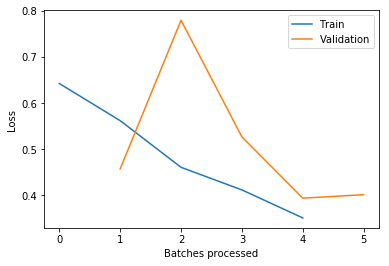

In [48]:
learn.recorder.plot_losses()

In [0]:
# Starting from layer 1 to layer n all the weights are saved.

In [0]:
learn.save("stage-2")

In [0]:
# interpretation

In [24]:
learn.load("stage-2")

Learner(data=ImageDataBunch;

Train: LabelList (116 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
rmdht,rmdht,rmdht,rmdht,rmdht
Path: data/landmark;

Valid: LabelList (28 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
gjbwg,rmdht,tam,tam,tam
Path: data/landmark;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stat

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

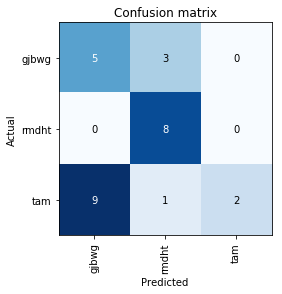

In [26]:
interp.plot_confusion_matrix()

In [0]:
# export learn object
# create export.pkl in the data/, contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used)

In [0]:
learn.export()

In [0]:
# prediction
# if want to use cpu for prediction, uncomment the following line
# defaults.device = torch.device('cpu')

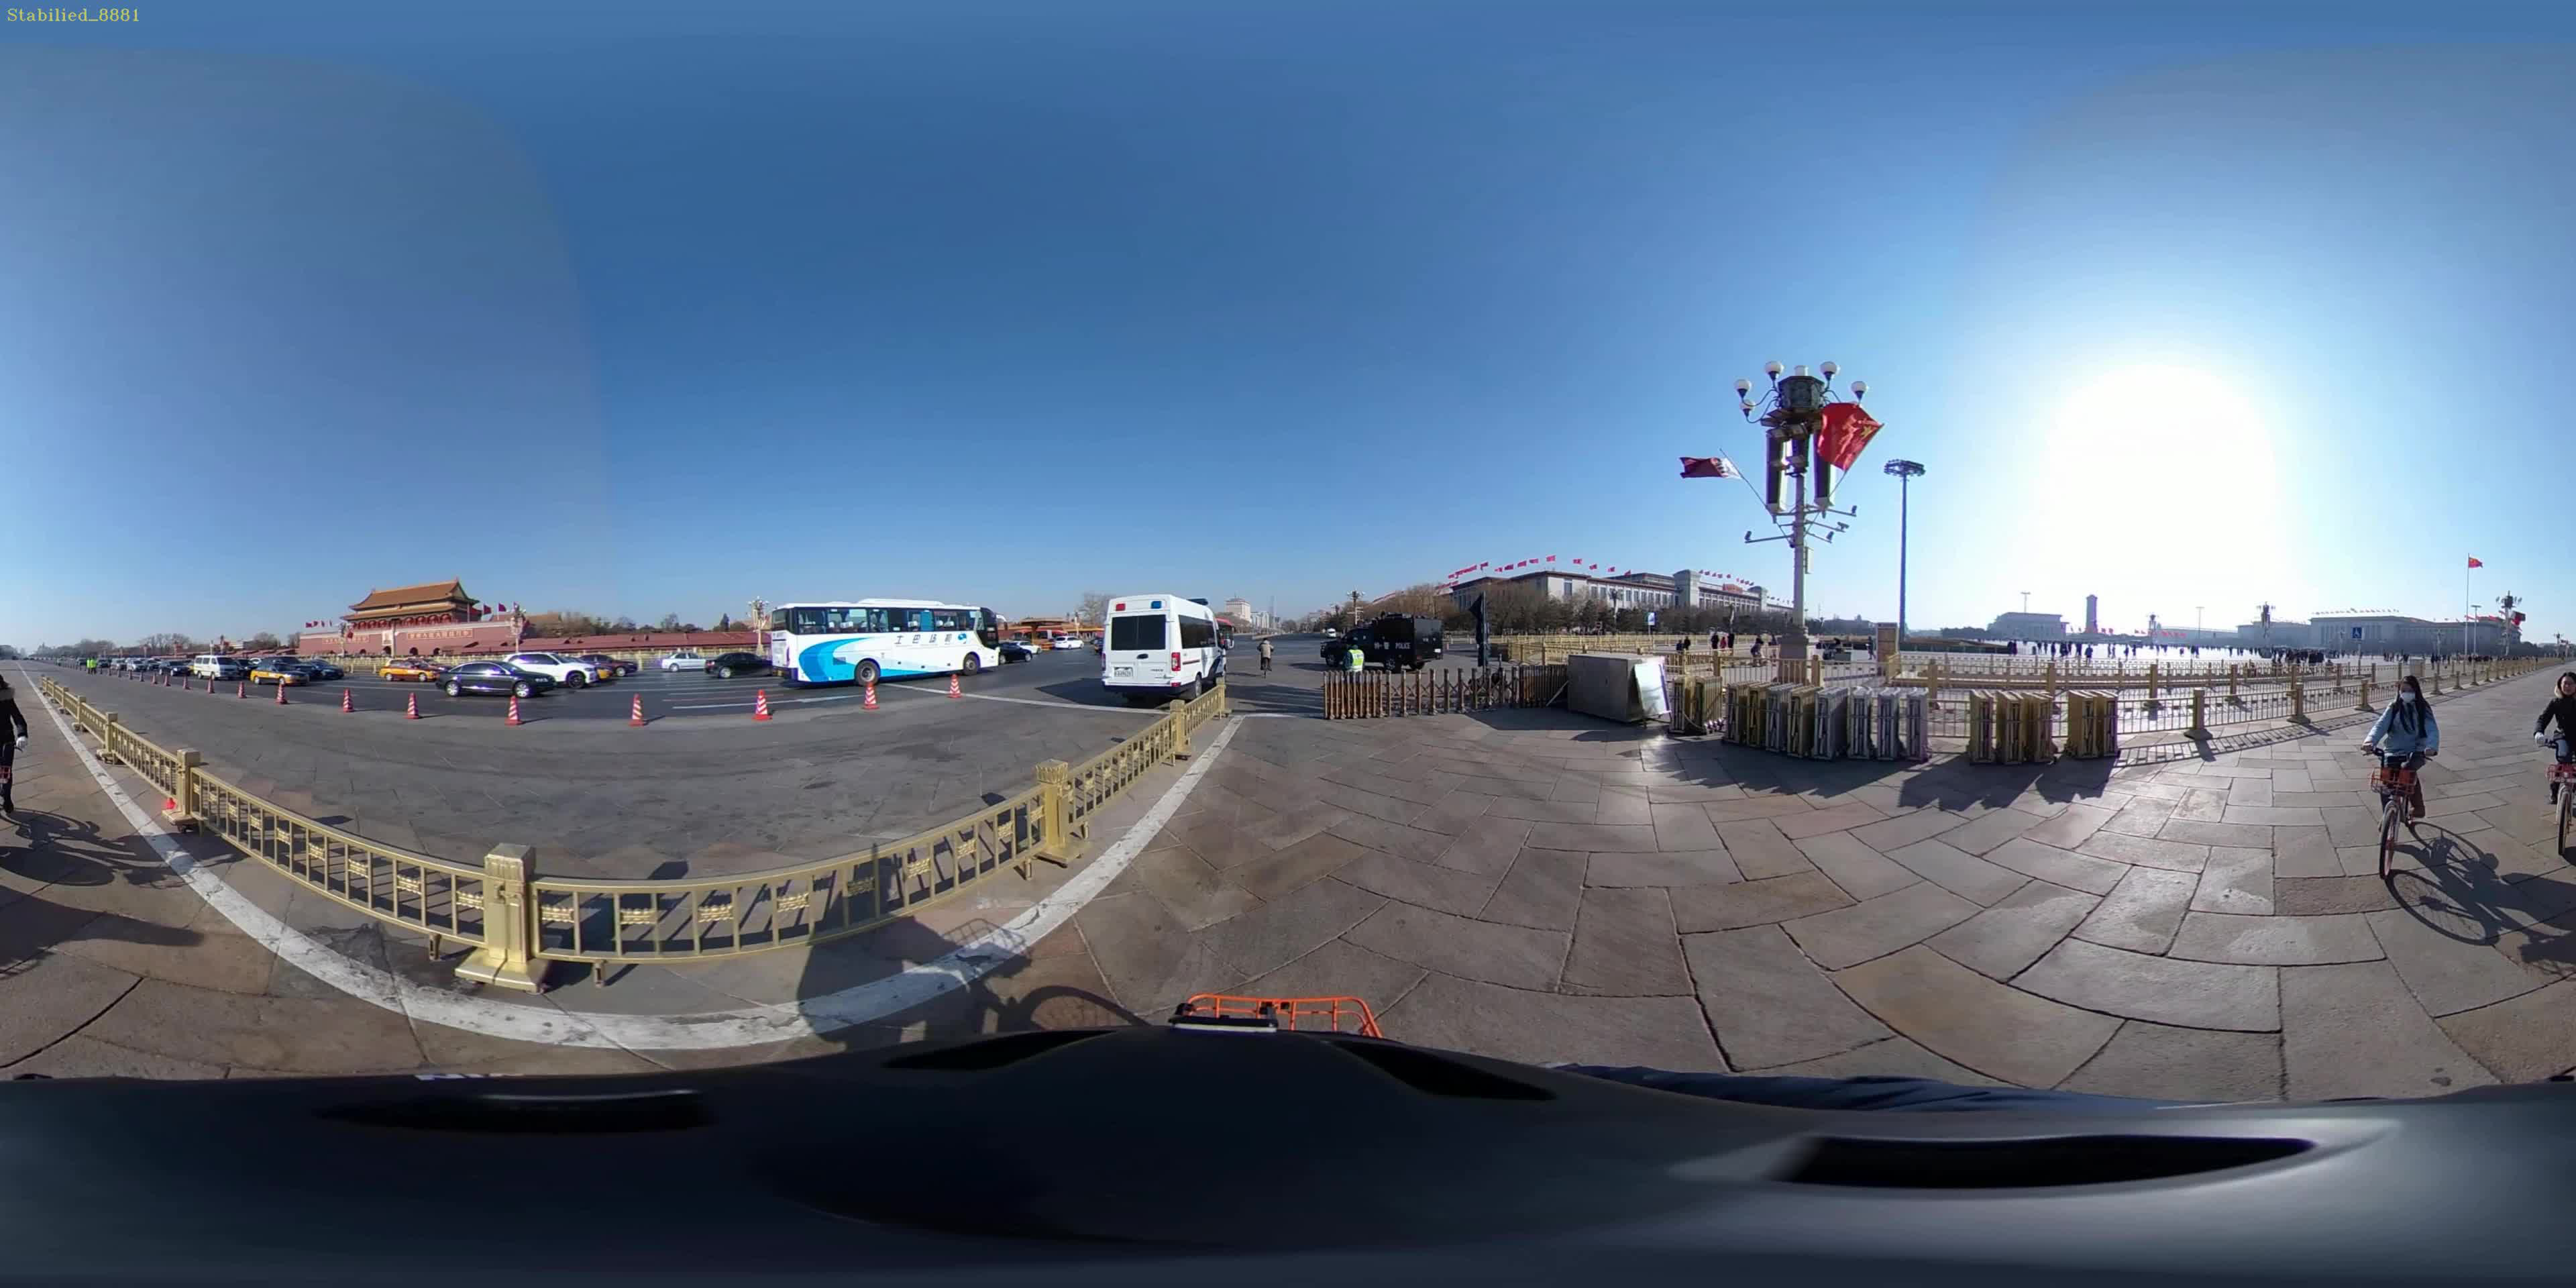

In [30]:
# load image
file = 'gjbwg.jpeg'
img = open_image(file)
img

In [0]:

# load model
path = "data/landmark/"
learn = load_learner(path)

In [36]:
pred_class, pred_idx, output = learn.predict(img)
pred_class

Category gjbwg